## Validating galaxy-galaxy lensing signal against SDSS measurements

In this notebook we show the galaxy-galaxy lensing signal ($\Delta \Sigma$) measured from CosmoDC2 where we attempt to match the lens selection to those used in Mandelbaum et al. (2016; M16; 1509.06762). This analysis tests the extent of the simulations that we can trust in terms of:
* sclaes useful for lensing measurements
* galaxy-halo connection as a function of stellar mass and colors

The lens selection are described as follows:
* 7 stellar mass bins: $\log(M*/M_{\odot})=$ [10-10.4, 10.4-10.7, 10.7-11.0, 11.0-11.2, 11.2-11.4, 11.4-11.6, 11.6-15.0]
* for each bin, split into red and blue based on $g-r=0.7$
* $0.03 <z<0.2$
* $r<17.7$

I used the cosmoDC2_image catalog, which is roughly 436.4 deg$^{2}$. This gives the number of lens galaxies:
* Red: [2642., 4061., 4868., 3199., 1844.,  695.,  270.]
* Blue: [1718., 1404., 1024.,  325.,   87.,   18.,    0.]

and the number densities (per arcmin$^2$):
* Red: [0.00168169, 0.00258491, 0.00309858, 0.00203623, 0.00117374, 0.00044238, 0.00017186]
* Blue: [1.09354313e-03, 8.93675527e-04, 6.51797535e-04, 2.06869335e-04, 5.53773297e-05, 1.14573786e-05, 0.00000000e+00]

Compared with M16's number density (assuming 7748 deg$^2$):
* Red: [0.00117042, 0.00232929, 0.00341154, 0.00206347, 0.00127105, 0.00051329, 0.00012587]
* Blue: [2.31802652e-03, 2.30361121e-03, 1.85440742e-03, 5.01014009e-04, 1.08213977e-04, 1.27472163e-05, 3.58515459e-06]

First we plot the number density:

In [5]:
#np.array([4244.,17542., 44724., 37987., 28008., 12599., 3195.])/np.array([0.13, 0.27, 0.47, 0.66, 0.79, 0.88, 0.91])/7748/60/60
#np.array([20690.,30842.,33621.,11040.,2626.,320.,96.])/np.array([0.32,0.48,0.65,0.79,0.87,0.90,0.96])/7748/60/60

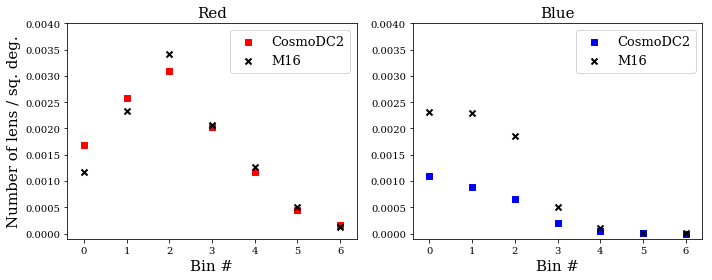

In [24]:
n_r_dc2 = np.array([0.00168169, 0.00258491, 0.00309858, 0.00203623, 0.00117374, 0.00044238, 0.00017186])
n_r_data = np.array([0.00117042, 0.00232929, 0.00341154, 0.00206347, 0.00127105, 0.00051329, 0.00012587])
n_b_dc2 = np.array([1.09354313e-03, 8.93675527e-04, 6.51797535e-04, 2.06869335e-04, 5.53773297e-05, 1.14573786e-05, 0.00000000e+00])
n_b_data = np.array([2.31802652e-03, 2.30361121e-03, 1.85440742e-03, 5.01014009e-04, 1.08213977e-04, 1.27472163e-05, 3.58515459e-06])

mplot.figure(figsize=(10,4))
mplot.subplot(121)
mplot.scatter(np.arange(7), n_r_dc2, marker='s', label='CosmoDC2', color='r')
mplot.scatter(np.arange(7), n_r_data, marker='x', lw=2, label='M16', color='k')
mplot.title('Red', fontsize=15)
mplot.xlabel('Bin #', fontsize=15)
mplot.ylabel('Number of lens / sq. deg.', fontsize=15)
mplot.ylim(-0.0001,0.004)
mplot.legend(fontsize=13)

mplot.subplot(122)
mplot.scatter(np.arange(7), n_b_dc2, marker='s', label='CosmoDC2', color='b')
mplot.scatter(np.arange(7), n_b_data, marker='x', lw=2, label='M16', color='k')
mplot.title('Blue', fontsize=15)
mplot.xlabel('Bin #', fontsize=15)
mplot.ylim(-0.0001,0.004)
mplot.legend(fontsize=13)

mplot.tight_layout()

Next we plot the $\Delta \Sigma$ measurements. The measurement code itself is hard to put in a notebook so I'll just show the results, but it's standard treecorr measurement code.

In [27]:
import numpy as np
import pylab as mplot
%pylab inline
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

SM_min = np.array([10,10.4,10.7,11.0,11.2,11.4,11.6])
SM_max = np.array([10.4,10.7,11.0,11.2,11.4,11.6,15.0])

Populating the interactive namespace from numpy and matplotlib


/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


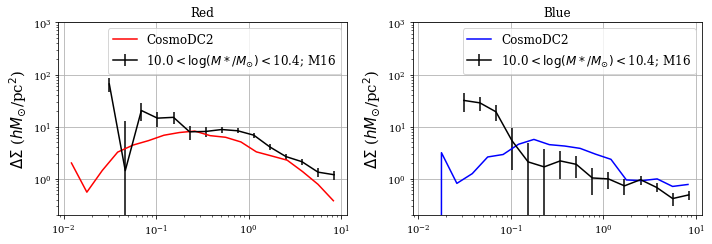

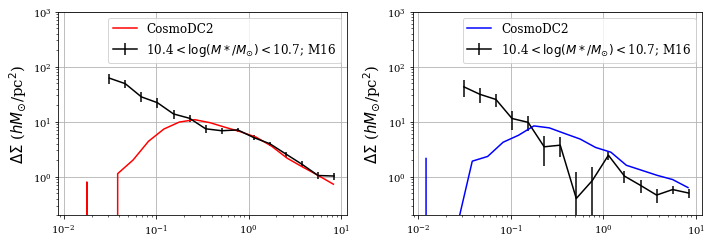

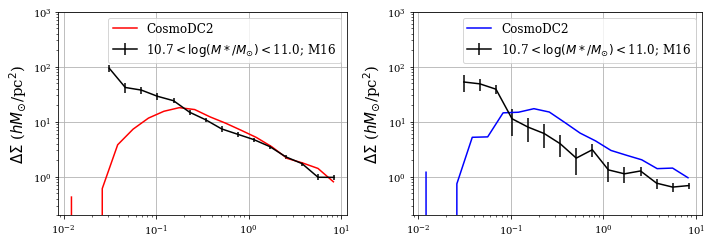

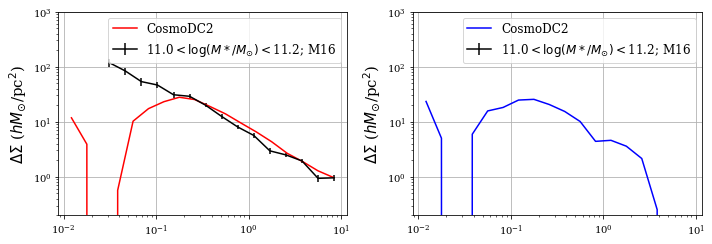

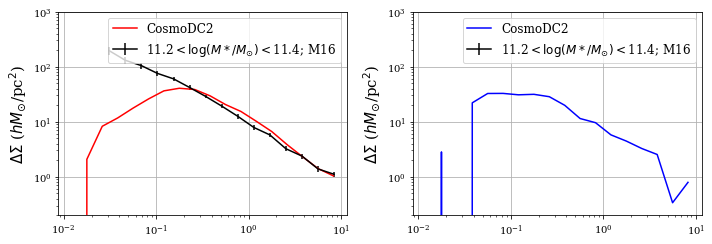

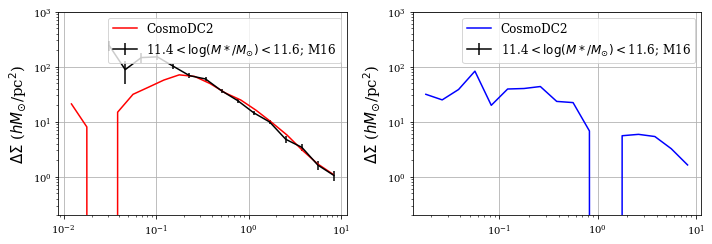

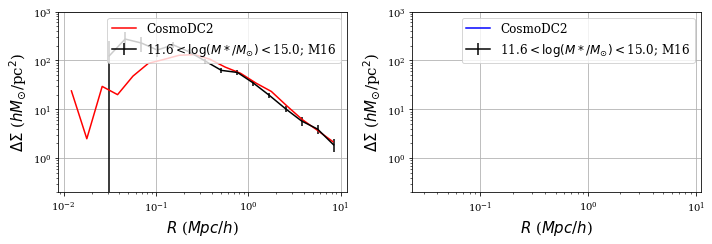

In [28]:
h = 0.7
for i in range(7):
    infile_r = np.load('DeltaSigma_cosmoDC2_SM'+str(i+1)+'_r.npz')
    data_r = np.loadtxt('SDSS_main_red_DS.dat')
    infile_b = np.load('DeltaSigma_cosmoDC2_SM'+str(i+1)+'_b.npz')
    data_b = np.loadtxt('SDSS_main_blue_DS.dat')

    mplot.figure(figsize=(10,3.5))
    
    mplot.subplot(121)
    mplot.loglog(infile_r['R']*h,np.sum(infile_r['gt'], axis=0)/np.sum(infile_r['npairs'], axis=0)/h/10**12, color='r', label='CosmoDC2')
    mplot.errorbar(data_r[:,0], data_r[:,2*i+1], yerr=data_r[:,2*i+2], color='k', label=str(SM_min[i])+'$< \log(M*/M_{\odot}) <$'+str(SM_max[i])+'; M16')
    
    
    mplot.ylabel('$\Delta \Sigma$ ($h M_{\odot}$/pc$^{2}$)', fontsize=15)
    mplot.ylim(0.2,1000)
    mplot.grid()
    mplot.legend(loc=1,fontsize=12)
    if i==0:
        mplot.title('Red')
    if i==6:
        mplot.xlabel('$R$ ($Mpc/h$)', fontsize=15)
        
    mplot.subplot(122)
    mplot.loglog(infile_b['R']*h,np.sum(infile_b['gt'], axis=0)/np.sum(infile_b['npairs'], axis=0)/h/10**12, color='b', label='CosmoDC2')
    mplot.errorbar(data_b[:,0], data_b[:,2*i+1], yerr=data_b[:,2*i+2], color='k', label=str(SM_min[i])+'$< \log(M*/M_{\odot}) <$'+str(SM_max[i])+'; M16')
    
    mplot.ylabel('$\Delta \Sigma$ ($h M_{\odot}$/pc$^{2}$)', fontsize=15)
    mplot.ylim(0.2,1000)
    mplot.grid()
    mplot.legend(fontsize=12)
    if i==0:
        mplot.title('Blue')
    if i==6:
        mplot.xlabel('$R$ ($Mpc/h$)', fontsize=15)

    mplot.tight_layout()